In [0]:
##Preprocessing and Future Selection of varibles

In [0]:
!pip install feature-selector

In [0]:
from  feature_selector import FeatureSelector

In [0]:
import pandas as pd
data1=pd.read_csv('PimaIndiansDiabetes.csv')

In [0]:
data1.columns.values

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'Class'], dtype=object)

In [0]:
train=data1.loc[:,data1.columns !='Class']
train_labels=data1.loc[:,data1.columns =='Class']

train_labels

,Class
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [0]:
fs=FeatureSelector(data=train,labels=train_labels)

In [0]:
fs

In [0]:
fs.identify_missing(missing_threshold=0.6)

0 features with greater than 0.60 missing values.



In [0]:
fs.missing_stats.head()

,missing_fraction
V1,0.0
V26,0.0
V20,0.0
V21,0.0
V22,0.0


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

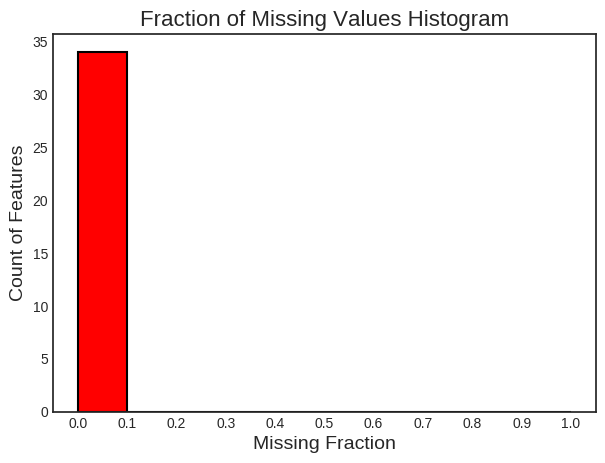

In [0]:
# To Plot the data of missing values

fs.plot_missing()
plt.show()

In [0]:
# Collinear Features


In [0]:
fs.identify_collinear(correlation_threshold=0.50)

16 features with a correlation magnitude greater than 0.50.



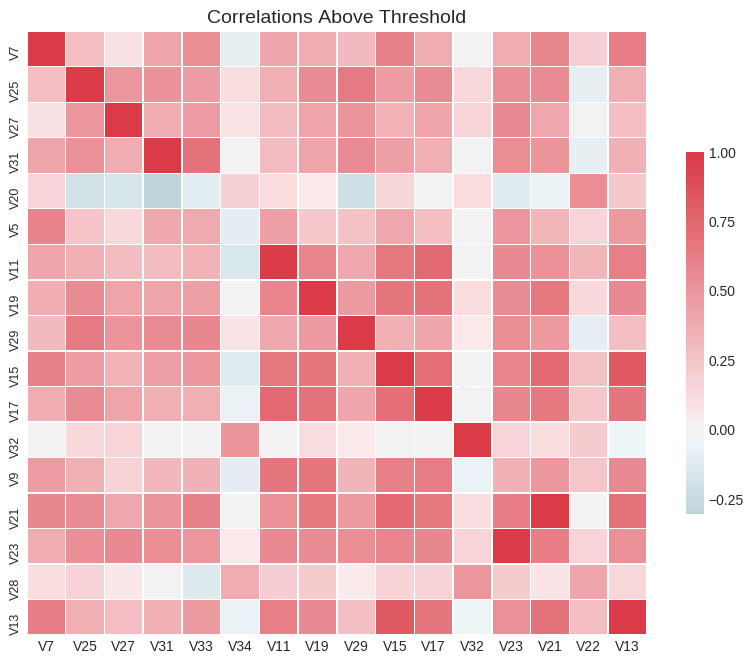

In [0]:
fs.plot_collinear()
plt.show()

In [0]:
## Zero importance feature
fs.identify_zero_importance(task='classification',
                            eval_metric='auc',
                           n_iterations=10,
                           early_stopping=True)
zero_importance_features=fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[111]	valid_0's auc: 0.989394
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[86]	valid_0's auc: 0.996622
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[139]	valid_0's auc: 0.992063
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[224]	valid_0's auc: 0.991379
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[60]	valid_0's auc: 0.957516
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[59]	valid_0's auc: 0.970588
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[54]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, be

In [0]:
fs.plot_feature_importances(threshold=0.99,plot_n=12)

In [0]:
# Least important features

fs.identify_low_importance(cumulative_importance=0.99)

30 features required for cumulative importance of 0.99 after one hot encoding.
4 features do not contribute to cumulative importance of 0.99.



In [0]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,V3,128.0,0.120994,0.120994
1,V5,75.5,0.071368,0.192362
2,V4,59.3,0.056054,0.248417
3,V6,54.3,0.051328,0.299745
4,V28,54.0,0.051045,0.350789
5,V8,43.9,0.041497,0.392287
6,V27,42.8,0.040458,0.432744
7,V22,38.0,0.035920,0.468664
8,V7,35.6,0.033652,0.502316
9,V31,34.7,0.032801,0.535117


In [0]:
#single value feature
fs.identify_single_unique()

1 features with a single unique value.



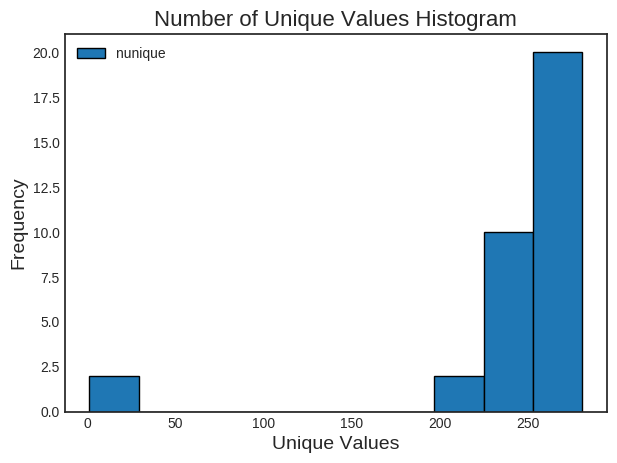

In [0]:
fs.plot_unique()

In [0]:
fs.identify_all(selection_params={'missing_threshold':0.6,
                                  'correlation_threshold':0.98,
                                  'task':'classification',
                                  'eval_metric':'auc',
                                  'cumulative_importance':0.99})

0 features with greater than 0.60 missing values.

1 features with a single unique value.

0 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[91]	valid_0's auc: 0.949206
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[141]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[23]	valid_0's auc: 0.959459
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[50]	valid_0's auc: 0.996904
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[10]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stop

In [0]:
train_removed_all=fs.remove(methods='all',keep_one_hot=False)

['missing', 'collinear', 'zero_importance', 'low_importance', 'single_unique'] methods have been run

Removed 3 features including one-hot features.


In [0]:
data=train_removed_all

In [0]:
data.head()

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34
0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
